<a href="https://colab.research.google.com/github/majavk/Data_Science_Portfolio/blob/main/multiclass_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Wine Quality Based on Multiclass Classification

The Wine Quality dataset is available on the https://www.kaggle.com/datasets.
The Wine Quality dataset is imbalanced multiclass dataset.
The dataset describes the problem of classification of the quality of wine using several parameters, chemical properties of the wine:


1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

There are 6 classes in the dataset.
The distribution of classes across the examples is imbalanced.
The class '5' has 42.26% of examples while the class '3' has only 0.52% of total examples.



In [1]:
#import collections
from collections import Counter
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd 
from scipy.stats import f_oneway, kurtosis
#from scipy.stats import kurtosis
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC


In [2]:
%matplotlib inline

#Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
path = '../DATA'
raw_data = pd.read_csv(path + 'WineQT.csv')


In [5]:
df = raw_data.copy()

#Exploratory Data Analyis

There are 13 columns in the dataset. 

The 'Id' column doesn't contain any useful information for modelling so it will be dropped. 

All the input variables are numerical types. 

The 'quality' column is the target column and even though it is numerical still it will be label encoded to shift classes from the range (3, 8) to (0, 5).


There are no missing values since there are 1143 elements in each column.
There are no duplicated rows.

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
df.shape


(1143, 13)

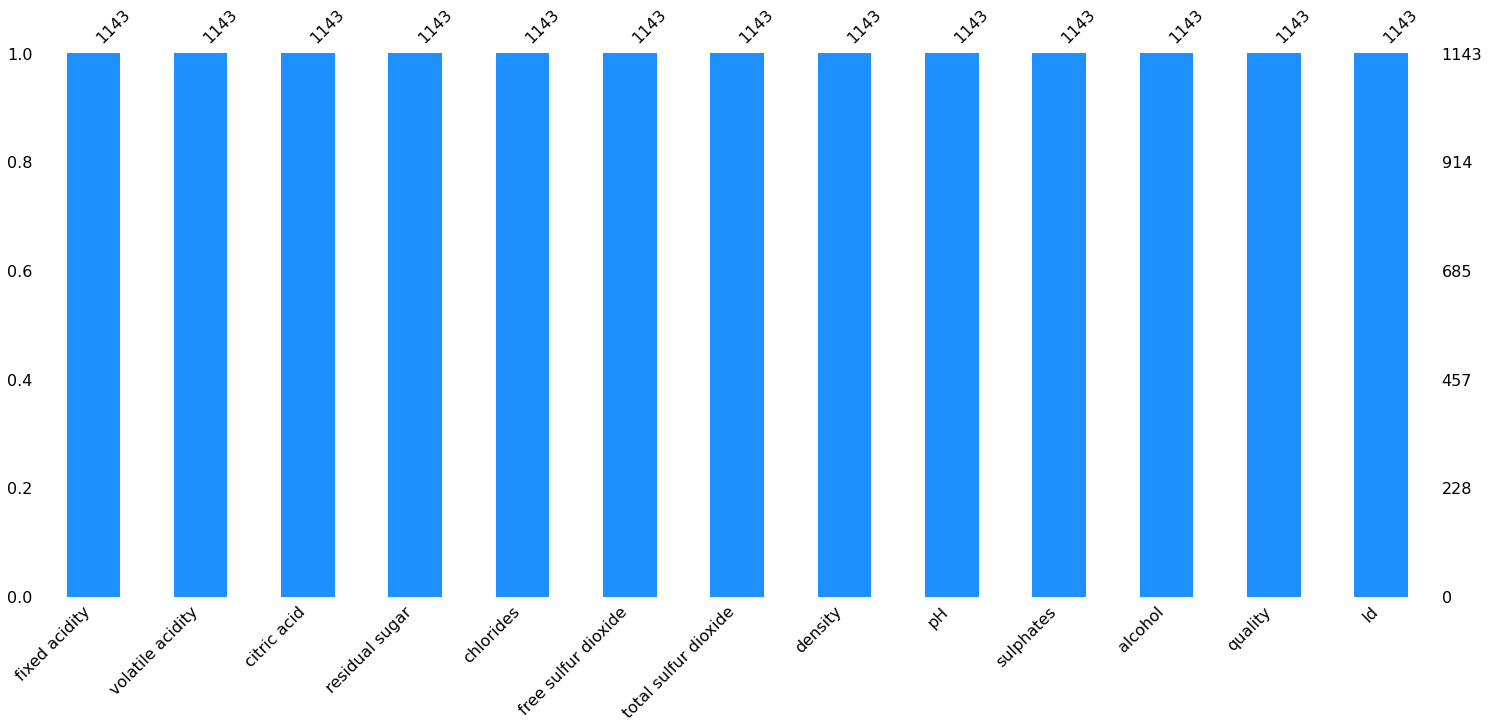

In [9]:
msno.bar(df, color='Dodgerblue')
plt.show()


In [10]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [11]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [12]:
df = df.drop('Id', axis=1)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## Univariate distribution

The distribution of input variables is visualized using histograms.

Some of the input variables are skewed.

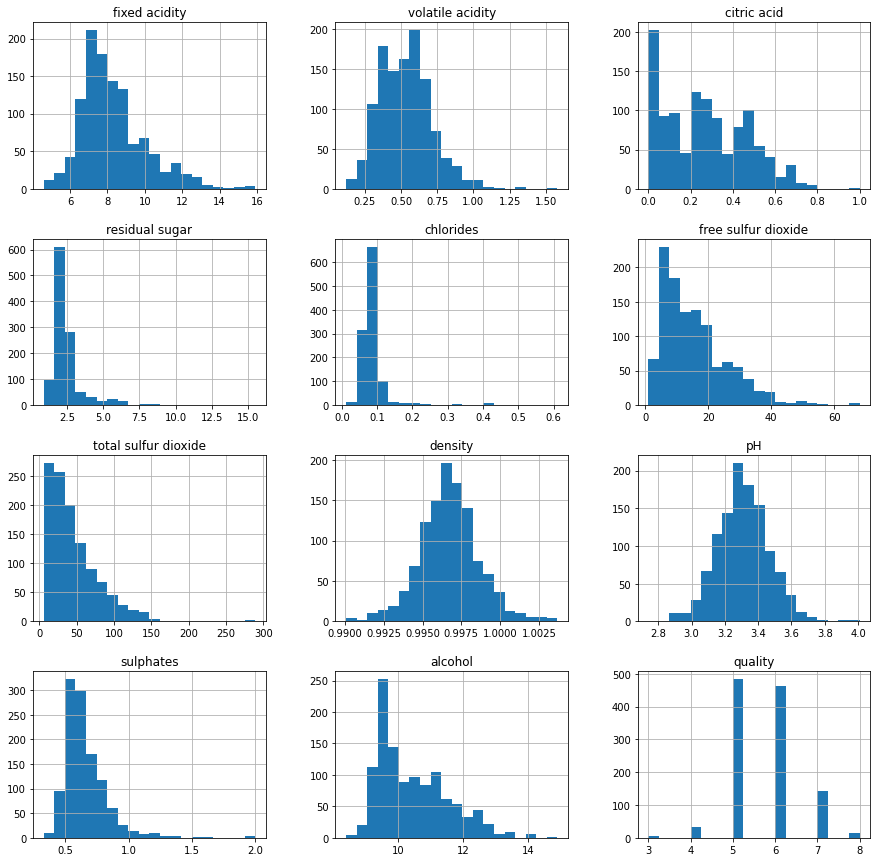

In [13]:
df.hist(bins=20, xlabelsize=10, ylabelsize=10, figsize=(15,15))
plt.show()


In [14]:
def symmetry_report(df):
  label_list = list()
  skewness_list = list()
  kurtosis_list = list()
  
  for label, content in df.iloc[:,:-1].items():
    label_list.append(label)
    skewness_list.append(round(content.skew(),2))
    kurtosis_list.append(round(content.kurtosis(),2))
      
  df_report=pd.DataFrame()  
  df_report['input_variable'] = label_list
  df_report['skewness'] = skewness_list
  df_report['kurtosis'] = kurtosis_list

  
  return df_report


In [15]:
symmetry_report(df).set_index('input_variable')


,skewness,kurtosis
input_variable,,
fixed acidity,1.04,1.38
volatile acidity,0.68,1.38
citric acid,0.37,-0.71
residual sugar,4.36,27.68
chlorides,6.03,47.08
free sulfur dioxide,1.23,1.93
total sulfur dioxide,1.67,5.10
density,0.10,0.89
pH,0.22,0.93


The most skewed input variable, 'chlorides', has the skewness of 6.026 and  kurtosis 47.48.

'residual sugar' variable has the skewness 4.36 and kurtosis 27.68.

'sulphates' variable has high kurtosis, 12.017.
  

Because of skewed data the PowerTransform and StandardScaler both will be used and compared.

##Bivariate distribution - Correlation in data

Some input variables are highly correlated.

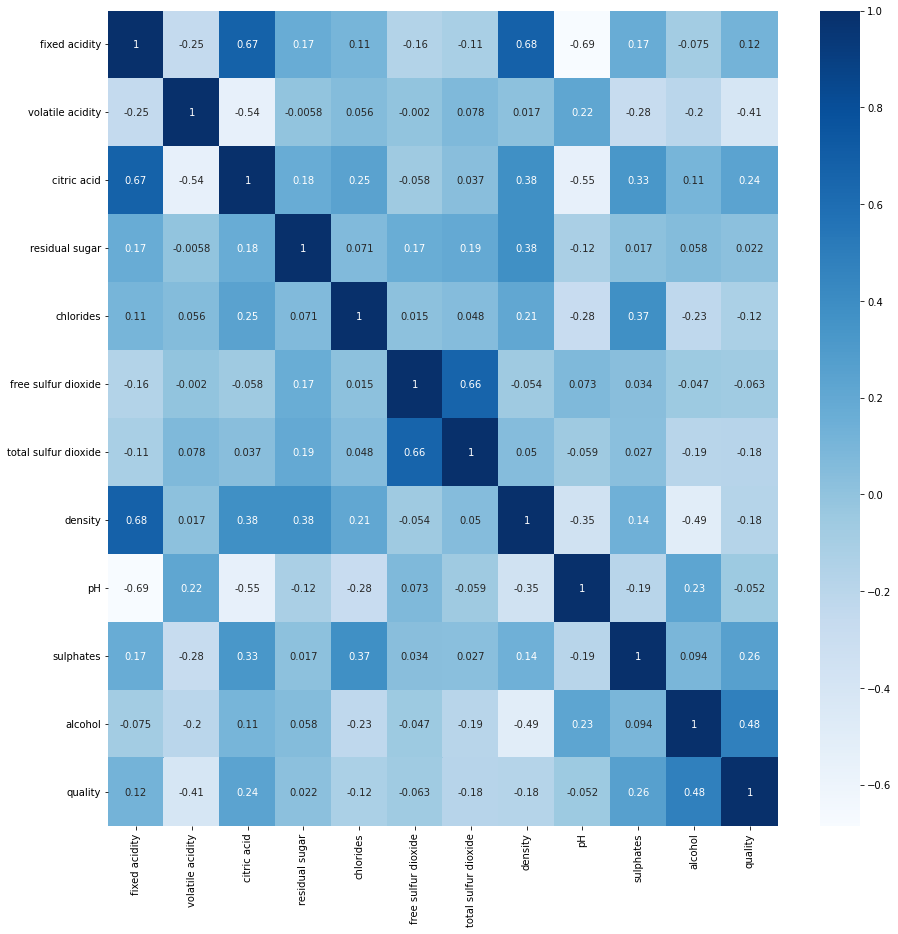

In [16]:
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(df.corr(), annot=True, cmap='Blues', cbar=True)
plt.show()


In [17]:
#dropping highly correlated features
def omit_high_corr(df, max_corr):
  corr_matrix = df.corr().abs()
  upper_triangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
  columns_to_drop = [column for column in upper_triangular.columns if any(upper_triangular[column] > max_corr)]
  df=df.drop(df[columns_to_drop], axis=1)
  print(columns_to_drop)
  return df
  

The input variables with pearsons-r correlation higher than 0.65 will be omitted.

In [18]:
df = omit_high_corr(df, 0.65)


['citric acid', 'total sulfur dioxide', 'density', 'pH']


The 4 input variables will be omitted from the further analysis due to higher correlation.

In [19]:
df.shape


(1143, 8)

###'quality' class column - dependent variable

The dataset has 6 different classes.



In [20]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

The classes are imbalanced.

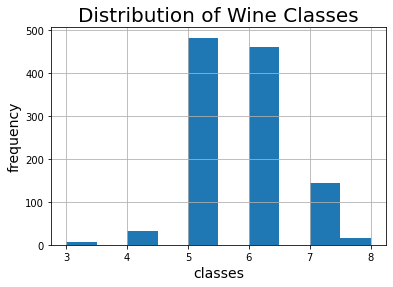

In [21]:
df['quality'].hist()
plt.title('Distribution of Wine Classes', size=20)
plt.xlabel('classes', size=14)
plt.ylabel('frequency', size=14)
plt.show()


In [22]:
counter = Counter(df['quality'])

print(f"{'Class':>10} {'Counts':>10} {'Percentage':>15}")
for k,v in counter.items():
	percentage = round(v * 100 / len(df['quality']), 2)
	print(f'\n{k:10} {v:10} {percentage:>15}')
 

     Class     Counts      Percentage

         5        483           42.26

         6        462           40.42

         7        143           12.51

         4         33            2.89

         8         16             1.4

         3          6            0.52


The distribution of classes is highly imbalanced so the balancing of the classes will be performed.

Since the 'quality' column is regarded as a cathegorical variable, in order to understand if the quality of the wine is changing with every input variable, which are all numerical, besides the visualization by histogram, box-plot and bar plot, the ANOVA test will be performed.

ANOVA test  will indicate, especially when visualization is not giving unambiguous answer, weather the mean value of the input variable is varying significantly for at least two different cathegories. This will determine the input variable as a predictor for the quality of the wine class.



In [ ]:
#predictive power for the wine quality of each feature

fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(20,25))

for i in range(0,7):
  x = df.columns.values[i]
  y = df['quality']
  sns.kdeplot(x, data=df, hue=y, palette='bright', ax=ax[i,0])
  sns.boxplot(y,x, data=df, palette='bright', ax=ax[i,1]) 
  sns.barplot(y,x, palette='bright', data=df,ax=ax[i,2]) 
 
plt.show() 


ANOVA test gives the result that the residual sugar is not predictor for this problem, so it will be dropped in further analyisis'

In [24]:
for i in range(0, 6):
  CategoryGroupLists=df.groupby('quality')[df.columns.values[i]].apply(list)
  AnovaResults = f_oneway(*CategoryGroupLists)

  print(f'Anova test P-Value for the variables quality and {df.columns.values[i]}: {round(AnovaResults[1],3)}')
  

Anova test P-Value for the variables quality and fixed acidity: 0.001
Anova test P-Value for the variables quality and volatile acidity: 0.0
Anova test P-Value for the variables quality and residual sugar: 0.291
Anova test P-Value for the variables quality and chlorides: 0.003
Anova test P-Value for the variables quality and free sulfur dioxide: 0.02
Anova test P-Value for the variables quality and sulphates: 0.0


In [25]:
df = df.drop('residual sugar', axis=1)
df.shape


(1143, 7)

## Data Preprocessing

The cathegory 3 has only 6 observations. 
Since the Repeated Stratified KFold will be used for the model evaluation, the number of splits will be 10, there is not enough elements of the cathegory 3 for each split, so the classcathegory 3 will be neglected.

In [26]:
# the class 3 has only 6 observations so we will neglect it
df = df[df['quality']!=3]


In [27]:
df.shape


(1137, 7)

Balancing the dataset.

Each class will be downsampled or upsampled to 227 samples (total number of samples divided by the number of classes).

In [28]:
# we will upsample and downsample the rest 5 classes because we have imbalanced dataset. we will have in each class 227 (1137//5)
target = df['quality']

features = df.iloc[:, :-1]
i_class5 = np.where(target == 5)[0]
i_class6 = np.where(target == 6)[0]
print(i_class5.shape, i_class6.shape)

n_class5 = len(i_class5)
n_class6 = len(i_class6)

i_class5_downsampled = np.random.choice(i_class5, size=227, replace=False)
i_class6_downsampled = np.random.choice(i_class6, size=227, replace=False)

np.hstack((target.iloc[i_class5_downsampled], target.iloc[i_class6_downsampled ]))
np.vstack((features.iloc[i_class5_downsampled,:], features.iloc[i_class6_downsampled,:] ))


(483,) (462,)


array([[ 9.3  ,  0.43 ,  0.085,  9.   ,  0.55 ,  9.5  ],
       [ 9.9  ,  0.54 ,  0.071, 16.   ,  0.62 ,  9.4  ],
       [ 9.5  ,  0.86 ,  0.079, 13.   ,  0.62 , 10.   ],
       ...,
       [11.9  ,  0.38 ,  0.121,  7.   ,  0.76 , 10.4  ],
       [ 7.7  ,  0.6  ,  0.079, 19.   ,  0.62 , 10.1  ],
       [ 7.1  ,  0.75 ,  0.059, 11.   ,  0.4  , 12.8  ]])

In [29]:
i_class4 = np.where(target == 4)[0]
i_class7 = np.where(target == 7)[0]
i_class8 = np.where(target == 8)[0]

i_class4_upsampled = np.random.choice(i_class4, size=227, replace=True)
i_class7_upsampled = np.random.choice(i_class7, size=227, replace=True)
i_class8_upsampled = np.random.choice(i_class8, size=227, replace=True)

np.concatenate((target.iloc[i_class4_upsampled], target.iloc[i_class7_upsampled ], target.iloc[i_class8_upsampled]))

np.vstack((features.iloc[i_class4_upsampled, :], features.iloc[i_class7_upsampled, :], features.iloc[i_class8_upsampled, :] ))


array([[ 7.3  ,  0.35 ,  0.067, 28.   ,  0.54 , 10.   ],
       [ 7.5  ,  0.38 ,  0.073, 22.   ,  0.7  ,  9.6  ],
       [ 6.2  ,  0.785,  0.06 ,  6.   ,  0.61 , 10.   ],
       ...,
       [11.3  ,  0.62 ,  0.086,  6.   ,  0.69 , 13.4  ],
       [ 7.2  ,  0.33 ,  0.061,  3.   ,  1.1  , 10.   ],
       [10.7  ,  0.35 ,  0.07 ,  5.   ,  0.65 , 11.   ]])

In [30]:
y = np.concatenate((target.iloc[i_class4_upsampled], 
                    target.iloc[i_class7_upsampled], 
                    target.iloc[i_class8_upsampled],
                    target.iloc[i_class5_downsampled], 
                    target.iloc[i_class6_downsampled])
)

X = np.vstack((features.iloc[i_class4_upsampled, :],
               features.iloc[i_class7_upsampled, :], 
               features.iloc[i_class8_upsampled, :],
               features.iloc[i_class5_downsampled, :],
               features.iloc[i_class6_downsampled, :]
))


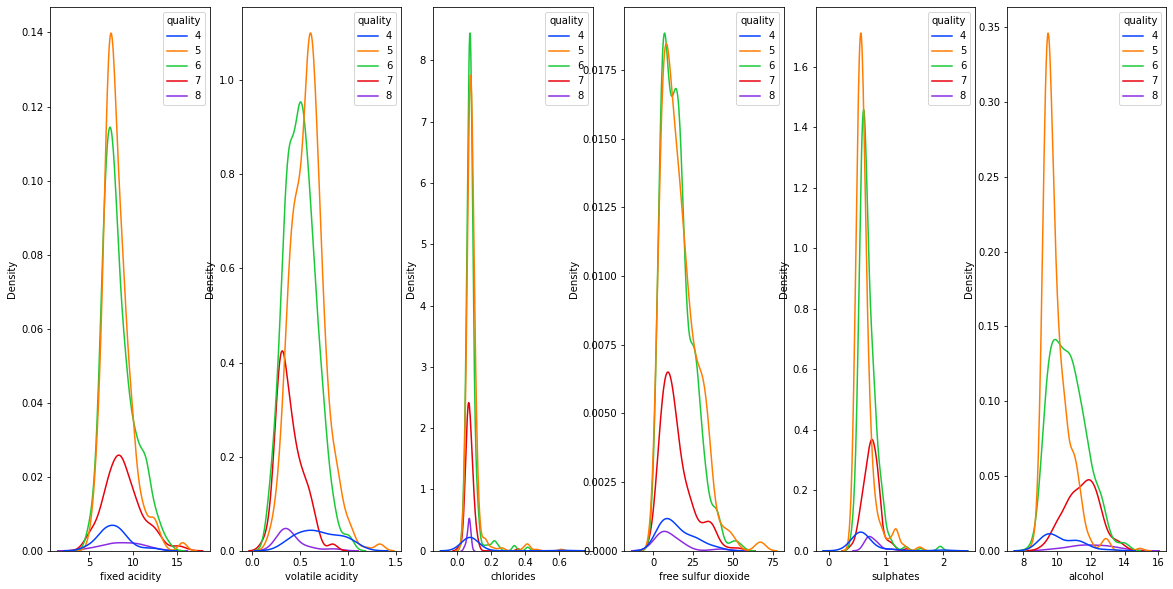

In [31]:

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20,10))


for i in range(0,6):
  sns.kdeplot(data=df, x=df.columns.values[i], hue='quality', palette='bright', ax=ax[i], warn_singular=False)
plt.show()


Because of the skewed input variables the model will be selected and evaluated for two scaling options, Standards Scaler and Power Transform.

#Model Selection

In [32]:
def evaluate_model(X, y, model):
	rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=rskf, n_jobs=-1)
	return scores
	

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)


Scaling data using Standard Scaler.

In [34]:
scaler = preprocessing.StandardScaler()
le = preprocessing.LabelEncoder()

X_train = scaler.fit_transform(X_train)
y_train = le.fit_transform(y_train)

X_test = scaler.transform(X_test)
y_test = le.transform(y_test)


Scaling data using the Power Transform.

In [35]:
X_train_pt, X_test_pt, y_train_pt, y_test_pt = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)


In [36]:
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
le_pt = preprocessing.LabelEncoder()

X_train_pt = pt.fit_transform(X_train_pt)
y_train_pt = le_pt.fit_transform(y_train)

X_test_pt = pt.fit_transform(X_test_pt)
y_test_pt = le_pt.fit_transform(y_test)

The below listed models will be evaluated on the training set, for the two scaling options.

In [37]:
models = [LogisticRegression(random_state=0, multi_class="ovr"),
	LogisticRegression(solver='lbfgs', multi_class='multinomial'),
	LinearDiscriminantAnalysis(),
	LinearSVC(),
	KNeighborsClassifier(n_neighbors=1),
	GaussianProcessClassifier(),
	OneVsRestClassifier(SVC()),
	BaggingClassifier(n_estimators = 1000),
	RandomForestClassifier(n_estimators=1000),
	ExtraTreesClassifier(n_estimators=1000)
	]
models_shortname =['LROVR','LR','LDA', 'SVM','KNN','GP','OVR_SVC', 'EBB', 'RF', 'ET']
models, models_shortname 



([LogisticRegression(multi_class='ovr', random_state=0),
  LogisticRegression(multi_class='multinomial'),
  LinearDiscriminantAnalysis(),
  LinearSVC(),
  KNeighborsClassifier(n_neighbors=1),
  GaussianProcessClassifier(),
  OneVsRestClassifier(estimator=SVC()),
  BaggingClassifier(n_estimators=1000),
  RandomForestClassifier(n_estimators=1000),
  ExtraTreesClassifier(n_estimators=1000)],
 ['LROVR', 'LR', 'LDA', 'SVM', 'KNN', 'GP', 'OVR_SVC', 'EBB', 'RF', 'ET'])

>LogisticRegression(multi_class='ovr', random_state=0)	 Mean Accuracy: 0.463	 Standard Deviation:0.057
>LogisticRegression(multi_class='multinomial')	 Mean Accuracy: 0.458	 Standard Deviation:0.056
>LinearDiscriminantAnalysis()	 Mean Accuracy: 0.470	 Standard Deviation:0.059
>LinearSVC()	 Mean Accuracy: 0.463	 Standard Deviation:0.040
>KNeighborsClassifier(n_neighbors=1)	 Mean Accuracy: 0.784	 Standard Deviation:0.036
>GaussianProcessClassifier()	 Mean Accuracy: 0.691	 Standard Deviation:0.046
>OneVsRestClassifier(estimator=SVC())	 Mean Accuracy: 0.632	 Standard Deviation:0.043
>BaggingClassifier(n_estimators=1000)	 Mean Accuracy: 0.798	 Standard Deviation:0.034
>RandomForestClassifier(n_estimators=1000)	 Mean Accuracy: 0.806	 Standard Deviation:0.038
>ExtraTreesClassifier(n_estimators=1000)	 Mean Accuracy: 0.831	 Standard Deviation:0.029


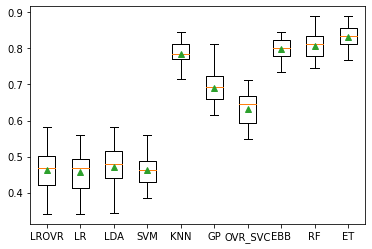

In [38]:
results = list()

for item in models:
	scores = evaluate_model(X_train, y_train, item)
	results.append(scores)
	
	print(f'>{item}\t Mean Accuracy: {np.mean(scores):.3f}\t Standard Deviation:{np.std(scores):.3f}')
plt.boxplot(results, labels=models_shortname, showmeans=True)
plt.show()


Evaluation of models on the training set scaled by Power Transform.

>LogisticRegression(multi_class='ovr', random_state=0)	 Mean Accuracy: 0.468	 Standard Deviation:0.046
>LogisticRegression(multi_class='multinomial')	 Mean Accuracy: 0.478	 Standard Deviation:0.052
>LinearDiscriminantAnalysis()	 Mean Accuracy: 0.504	 Standard Deviation:0.050
>LinearSVC()	 Mean Accuracy: 0.463	 Standard Deviation:0.040
>KNeighborsClassifier(n_neighbors=1)	 Mean Accuracy: 0.779	 Standard Deviation:0.040
>GaussianProcessClassifier()	 Mean Accuracy: 0.710	 Standard Deviation:0.037
>OneVsRestClassifier(estimator=SVC())	 Mean Accuracy: 0.648	 Standard Deviation:0.037
>BaggingClassifier(n_estimators=1000)	 Mean Accuracy: 0.797	 Standard Deviation:0.035
>RandomForestClassifier(n_estimators=1000)	 Mean Accuracy: 0.809	 Standard Deviation:0.038
>ExtraTreesClassifier(n_estimators=1000)	 Mean Accuracy: 0.833	 Standard Deviation:0.034


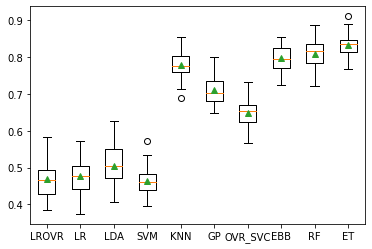

In [39]:
results = list()


for item in models:
	scores = evaluate_model(X_train_pt, y_train_pt, item)
	results.append(scores)
	
	print(f'>{item}\t Mean Accuracy: {np.mean(scores):.3f}\t Standard Deviation:{np.std(scores):.3f}')
plt.boxplot(results, labels=models_shortname, showmeans=True)
plt.show()

## Model Evaluation

Evaluation of the models that performed with about 80% scoring accuracy on the test set using the features scaled with the Standard Scaler.

In [40]:
models_test = [
	KNeighborsClassifier(n_neighbors=1),
	GaussianProcessClassifier(),
	BaggingClassifier(n_estimators = 1000),
	RandomForestClassifier(n_estimators=1000),
	ExtraTreesClassifier(n_estimators=1000)
	]
models_shortname =['KNN','GP', 'EBB', 'RF', 'ET']
models, models_shortname 


([LogisticRegression(multi_class='ovr', random_state=0),
  LogisticRegression(multi_class='multinomial'),
  LinearDiscriminantAnalysis(),
  LinearSVC(),
  KNeighborsClassifier(n_neighbors=1),
  GaussianProcessClassifier(),
  OneVsRestClassifier(estimator=SVC()),
  BaggingClassifier(n_estimators=1000),
  RandomForestClassifier(n_estimators=1000),
  ExtraTreesClassifier(n_estimators=1000)],
 ['KNN', 'GP', 'EBB', 'RF', 'ET'])

In [41]:
results_final = list()

# evaluate each model
for model in models_test:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy_score(y_test, y_pred)
  results_final.append(accuracy_score(y_test, y_pred))
  print( f"The accuracy with {model} and standard scaler: {round(accuracy_score(y_test, y_pred), 2)}") 
  

The accuracy with KNeighborsClassifier(n_neighbors=1) and standard scaler: 0.77
The accuracy with GaussianProcessClassifier() and standard scaler: 0.68
The accuracy with BaggingClassifier(n_estimators=1000) and standard scaler: 0.79
The accuracy with RandomForestClassifier(n_estimators=1000) and standard scaler: 0.79
The accuracy with ExtraTreesClassifier(n_estimators=1000) and standard scaler: 0.81


Evaluation of the models that performed with about 80% scoring accuracy on the test set using the features scaled with the Power Transform.

In [42]:
results_pt = list()
for model_pt in models_test:
  model_pt.fit(X_train_pt, y_train_pt)
  y_pred_pt = model_pt.predict(X_test_pt)
  accuracy_score(y_test_pt, y_pred_pt)
  results_pt.append(accuracy_score(y_test_pt, y_pred_pt))
  print( f"The accuracy with {model_pt} and power transform: {round(accuracy_score(y_test_pt, y_pred_pt), 2)}") 


The accuracy with KNeighborsClassifier(n_neighbors=1) and power transform: 0.78
The accuracy with GaussianProcessClassifier() and power transform: 0.72
The accuracy with BaggingClassifier(n_estimators=1000) and power transform: 0.68
The accuracy with RandomForestClassifier(n_estimators=1000) and power transform: 0.7
The accuracy with ExtraTreesClassifier(n_estimators=1000) and power transform: 0.7


## Conclusions

We can see that the models:

 

 


*   BaggingClassifier(n_estimators=1000)
*   RandomForestClassifier(n_estimators=1000) 
*   ExtraTreesClassifier(n_estimators=1000)



have accuracy about 80% on the train and the test set.

The results are different using Standard Scaler or Power Transform. Standard Scaler transformation gave the better results.

The best accuracy achieved, 82%, is with ExtraTreesClassifier(n_estimators=1000) and data transformed using Standard Scaler.